# Diamond Price Modelling

This is my first ever machine learning project. I will be applying what I've learnt so far (since 2 weeks) on this data set.

In this notebook, we will explore the factors that affect the price of a diamond with a goal of finding a model to help predict the price of diamonds.

### Notice
- The problem is requires **Supervised Learning**. The instances come with an expected output (*i.e* **the diamond's price**).
- Predicting the price of a diamond from dataset is a **Regression Task**. More specifically, a **Multivariate Regression Task**.
- We will be using the **Batch Learning** technique since the data is not live-fed from a source.
- We will also be the **Root Mean Square Error (RMSE)** for our performance measure (typical for Regression tasks).

**If you like this notebook, please up-vote! It keeps me motivated. Thank you! :)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load the diamond's dataset
diamonds = pd.read_csv("data/train/diamonds_train_cleaned.csv")

## Take a quick look at the Data Structure

Let's take a quick look at our diamonds dataset.

In [3]:
# Preview the top (five) rows of the dataset
diamonds.drop(labels='city', axis=1, inplace=True)
diamonds.head()

,Unnamed: 0,depth,table,x,y,z,price,carat,cut,color,clarity,xy,xz,zy,table_depth,carat/dimensons
0,0,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,1.005891,1.607059,0.625920,1.075862,0.006139
1,1,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,1.007874,1.628499,0.618898,1.062069,0.006386
2,2,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,1.010345,1.614325,0.625862,1.074138,0.006241
3,3,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,1.013369,1.688196,0.600267,0.993333,0.005931
4,4,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,1.013133,1.671827,0.606004,0.970968,0.006131


A little more information about our dataset.

In [4]:
# Preview the little information about dataset
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40425 entries, 0 to 40424
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40425 non-null  int64  
 1   depth            40425 non-null  float64
 2   table            40425 non-null  float64
 3   x                40425 non-null  float64
 4   y                40425 non-null  float64
 5   z                40425 non-null  float64
 6   price            40425 non-null  int64  
 7   carat            40425 non-null  float64
 8   cut              40425 non-null  object 
 9   color            40425 non-null  object 
 10  clarity          40425 non-null  object 
 11  xy               40425 non-null  float64
 12  xz               40425 non-null  float64
 13  zy               40425 non-null  float64
 14  table_depth      40425 non-null  float64
 15  carat/dimensons  40425 non-null  float64
dtypes: float64(11), int64(2), object(3)
memory usage: 4.9+ MB


Noticed an unnecessary column `Unnamed: 0`. It just acts as index, it is not needed, thus that needs to be dropped.

In [5]:
# Drop the "Unnamed: 0" column
diamonds = diamonds.drop("Unnamed: 0", axis = 1)

# Price is int64, best if all numeric attributes have the same datatype, especially as float64
diamonds["price"] = diamonds["price"].astype(float)

# Preview dataset again
diamonds.head()

,depth,table,x,y,z,price,carat,cut,color,clarity,xy,xz,zy,table_depth,carat/dimensons
0,62.4,58.0,6.83,6.79,4.25,4268.0,1.21,Premium,J,VS2,1.005891,1.607059,0.625920,1.075862,0.006139
1,61.6,58.0,6.40,6.35,3.93,3513.0,1.02,Premium,J,VS2,1.007874,1.628499,0.618898,1.062069,0.006386
2,62.3,58.0,5.86,5.80,3.63,1792.0,0.77,Premium,J,VS2,1.010345,1.614325,0.625862,1.074138,0.006241
3,59.6,60.0,7.58,7.48,4.49,7553.0,1.51,Premium,J,VS2,1.013369,1.688196,0.600267,0.993333,0.005931
4,60.2,62.0,5.40,5.33,3.23,1176.0,0.57,Premium,J,VS2,1.013133,1.671827,0.606004,0.970968,0.006131


There are **53490** instances in the dataset. There are also no missing instances in the dataset. *That looks clean!*

It's easier to work a dataset when all its attributes are numerical. The **cut**, **color** and **clarity** attributes are non-numeric (They are *objects*). We still have to convert them to be numerical.

Let's find out what categories exist for each of them.

In [6]:
# The diamond cut categories
diamonds["cut"].value_counts()

Ideal        16214
Premium      10250
Very Good     9094
Good          3659
Fair          1208
Name: cut, dtype: int64

In [7]:
# The diamond color categories
diamonds["color"].value_counts()

G    8446
E    7322
F    7170
H    6271
D    5049
I    4028
J    2139
Name: color, dtype: int64

In [ ]:
# The diamond clarity categories
diamonds["clarity"].value_counts()

SI1     9741
VS2     9243
SI2     6918
VS1     6062
VVS2    3799
VVS1    2774
IF      1327
I1       561
Name: clarity, dtype: int64

They each don't have so many categories, but still, we will be having a much longer table (*more columns*). That aside for now.

Let's take a preview of the summary of the numerical attributes and then an histogram on the dataset.

In [8]:
# Summary of each numerical attribute
diamonds.describe()

,depth,table,x,y,z,price,carat,xy,xz,zy,table_depth,carat/dimensons
count,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000,40425.000000
mean,61.753687,57.444609,5.729449,5.731488,3.538485,3926.158367,0.797344,0.999413,1.619656,0.617377,1.076856,0.006126
std,1.419295,2.216544,1.122322,1.114049,0.693125,3990.036045,0.475225,0.010352,0.038716,0.015047,0.053083,0.000135
min,52.300000,50.000000,3.770000,3.720000,2.060000,326.000000,0.200000,0.749169,0.990119,0.421348,0.752857,0.002847
25%,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000,0.400000,0.992606,1.598109,0.609718,1.046552,0.006048
50%,61.800000,57.000000,5.690000,5.710000,3.520000,2396.000000,0.700000,0.995736,1.615819,0.617716,1.082616,0.006117
75%,62.500000,59.000000,6.540000,6.540000,4.040000,5329.000000,1.040000,1.006928,1.637584,0.625239,1.112500,0.006190
max,73.600000,73.000000,10.230000,10.160000,6.720000,18823.000000,4.500000,1.615572,2.518939,1.003968,1.350000,0.011345


From the plot above, we could deduce that:
- `x`, `y`, `z` have strong correlations with `price`
- `carat` has the strongest correlation with `price` (0.92)
- `table` and `depth` have the weakest correlations

It is amazing so see that `carat` correlates best with price. Its score is pretty high! Now we use this for our *Stratified Sampling*.

Let's take a closer look at the `carat`'s histogram.

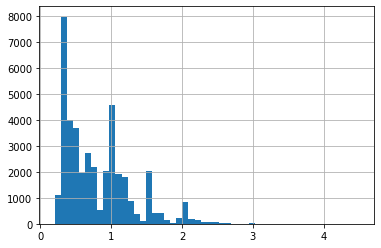

In [9]:
diamonds["carat"].hist(bins = 50)
plt.show()

Most diamonds are roughly between 0.3 and 1.5 Carats. Let's divide them into 5 categories, with those more than the 5th category merging into the 5th category.

In [10]:
# Divide the diamond carats by 0.4 to limit the number of carat categories
# Round up to have discrete categories
diamonds["carat_cat"] = np.ceil(diamonds["carat"] / 0.4)

# Merge categories > 5 in 5
diamonds["carat_cat"].where(diamonds["carat_cat"] < 5, 5.0, inplace = True)

Now let's see how much the diamonds are distributed in relation to the carat categories.

In [11]:
# Check the distribution of the diamonds in the categories
diamonds["carat_cat"].value_counts()

2.0    12698
1.0    10871
3.0    10021
4.0     4379
5.0     2456
Name: carat_cat, dtype: int64

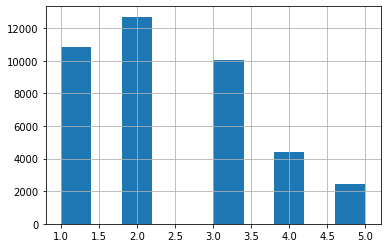

In [12]:
diamonds["carat_cat"].hist()
plt.show()

The distribution looks nice enough.

**PS:** I adjusted the divisor of `carat` until the distribution of the diamonds looked nice. *You could comment if you have any other ideas to doing this* :)

And yup! We can now perform a Stratified Sampling based on the carat categories :) I will use Scikit-Learn's `StratifiedShuffleSplit` class.

In [13]:
# Import the sklearn module
from sklearn.model_selection import StratifiedShuffleSplit

# Run the split. Creates on split and shares 20% of the dataset for the test set
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

# Separate the stratified train set and the test set
for train_index, test_index in split.split(diamonds, diamonds["carat_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

We now have our Train set and Test set, both stratified. From here, we don't need the `carat_cat` anylonger, hence we can drop it.

In [14]:
for set in (strat_train_set, strat_test_set):
    set.drop(["carat_cat"], axis = 1, inplace = True)

Our new `diamonds` dataset will now be the *Stratified Train set*.

In [15]:
# Redefined diamonds dataset
diamonds = strat_train_set.copy()
diamonds.head()

,depth,table,x,y,z,price,carat,cut,color,clarity,xy,xz,zy,table_depth,carat/dimensons
12559,61.2,58.0,4.35,4.38,2.67,671.0,0.31,Ideal,H,VVS1,0.993151,1.629213,0.609589,1.055172,0.006094
18166,60.7,56.0,4.32,4.34,2.63,407.0,0.30,Very Good,I,VS2,0.995392,1.642586,0.605991,1.083929,0.006084
36934,62.5,59.0,4.47,4.40,2.77,1040.0,0.33,Premium,F,VVS2,1.015909,1.613718,0.629545,1.059322,0.006057
5734,62.5,55.0,5.80,5.76,3.61,2801.0,0.73,Ideal,F,VS2,1.006944,1.606648,0.626736,1.136364,0.006053
38077,64.6,56.0,4.27,4.25,2.75,599.0,0.30,Fair,F,SI1,1.004706,1.552727,0.647059,1.153571,0.006011


These visualizations have been met by our theories during correlation. And it's very obvious here that depth and table have very weak correlation with price.

## Feature Scaling

With few exceptions, Machine Learning algrorithms don't perform well when the input numerical attributes have very different scales. We sure want our models to work well, so how can we go about it?

Feature scaling can be done in 2 ways: **Min-max scaling** and **Standardization**. I would preferably use Standardization, because it is much less affected by outliers. Scikit-Learn provides a transformer called `StandardScaler` for this transformation.

**PS:** You don't stratify your label, which is in our case `price`.

In [18]:
# Do not stratify the label
diamonds = strat_train_set.drop("price", axis = 1)

# Set a new dataset label variable
diamond_labels = strat_train_set["price"].copy()

# Drop all the category, so we could have only numeric
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis = 1)
diamonds_num.head()

,depth,table,x,y,z,carat,xy,xz,zy,table_depth,carat/dimensons
12559,61.2,58.0,4.35,4.38,2.67,0.31,0.993151,1.629213,0.609589,1.055172,0.006094
18166,60.7,56.0,4.32,4.34,2.63,0.30,0.995392,1.642586,0.605991,1.083929,0.006084
36934,62.5,59.0,4.47,4.40,2.77,0.33,1.015909,1.613718,0.629545,1.059322,0.006057
5734,62.5,55.0,5.80,5.76,3.61,0.73,1.006944,1.606648,0.626736,1.136364,0.006053
38077,64.6,56.0,4.27,4.25,2.75,0.30,1.004706,1.552727,0.647059,1.153571,0.006011


In [19]:
from sklearn.preprocessing import StandardScaler

# Perform the feature scaling on the numeric attributes of the dataset
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(diamonds_num)

# Preview 
pd.DataFrame(diamonds_num_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.384319,0.251306,-1.229048,-1.213101,-1.252447,-1.024835,-0.589633,0.241630,-0.511280,-0.406263,-0.234197
1,-0.736052,-0.650002,-1.255781,-1.249010,-1.310165,-1.045874,-0.378603,0.586000,-0.749509,0.134502,-0.304880
2,0.530185,0.701960,-1.122116,-1.195146,-1.108153,-0.982758,1.553456,-0.157413,0.809973,-0.328229,-0.499356
3,0.530185,-1.100657,0.063047,0.025773,0.103915,-0.141220,0.709283,-0.339492,0.623975,1.120555,-0.530584
4,2.007461,-0.650002,-1.300336,-1.329806,-1.137012,-1.045874,0.498484,-1.728113,1.969479,1.444151,-0.832167


That is what our data *will* look like during its processing. That's for the Machine Learning algorithm.

## Handling Categorical Attributes

From above, we split the columns of our dataset, putting aside the category attributes. Remember we still wanted to convert these attributes to numericaal attributes. How to we go about this?

We create one binary attribute per category: one attribute will be one while the rest will be 0. This is called **One-Hot Encoding**. Scikit-Learn provides a `OneHotEncoder` encoder to convert our category attributes to One-Hot vectors.

In [20]:
# We need only the category attributes to work with here
diamonds_cat = diamonds[["cut", "color", "clarity"]]
diamonds_cat.head()

,cut,color,clarity
12559,Ideal,H,VVS1
18166,Very Good,I,VS2
36934,Premium,F,VVS2
5734,Ideal,F,VS2
38077,Fair,F,SI1


In [21]:
from sklearn.preprocessing import OneHotEncoder

# Perform the one-hot encoding on the category attributes of the dataset
cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)

# Convert the encoded categories to arrays and Preview
pd.DataFrame(diamonds_cat_encoded.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Now that's what I meant by a longer table. What do we do next?

## Transformation Pipeline
We have our tables reformed, what we do now to to merge the numeric feature scaled attributes and the encoded category attributes. An easy way to do this without writing so much like above is to Scikit-Learn's `ColumnTransformer` class. This merging provides a single pipeline for the whole dataset.

In [22]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]

# Pipeline to transform our dataset
pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs), # Perform feaured scaling on numeric attributes
    ("cat", OneHotEncoder(), cat_attribs) # Perform One-Hot encoding on the category attributes
])

In [23]:
# Transformed dataset to feed the ML Algorithm
diamonds_ready = pipeline.fit_transform(diamonds)

# Preview
pd.DataFrame(diamonds_ready).head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.384319,0.251306,-1.229048,-1.213101,-1.252447,-1.024835,-0.589633,0.241630,-0.511280,-0.406263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.736052,-0.650002,-1.255781,-1.249010,-1.310165,-1.045874,-0.378603,0.586000,-0.749509,0.134502,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.530185,0.701960,-1.122116,-1.195146,-1.108153,-0.982758,1.553456,-0.157413,0.809973,-0.328229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.530185,-1.100657,0.063047,0.025773,0.103915,-0.141220,0.709283,-0.339492,0.623975,1.120555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.007461,-0.650002,-1.300336,-1.329806,-1.137012,-1.045874,0.498484,-1.728113,1.969479,1.444151,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


We now have our newly transformed dataset that can easily be fed to our Machine Learning Algorithms.

## Select and Train Model

We will create one function that will run through each algorithm. We'll also have variables that hold results of the algorithms for future comparisons. What does our fat function do?

- Fits the dataset into the model and create series of predictions to compare with labels. We check its performance with the **RMSE**.

- Performs some evaluation using Cross validation, which splits the training set into a number of CVs and train the model on the smaller sets. We then compare its mean with our intial RMSE.

- We view how well the model performs on our test set and compare its RMSE with that of the train set. Hopefully we don't have much difference.

- Some accuracy test of the model on the dataset is being evaluated

- We could also have a preview of what's going on. Some parts of the test set will be selected and then the model will run on them and we can then compare its result with the expected prices.

- We also get a preview this model's plot results and see how well it fits

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

# Our test set

# Remove label from test set
X_test = strat_test_set.drop("price", axis = 1)
# Have label stand alone
y_test = strat_test_set["price"].copy()

# Our models performance holder
models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE Mean
tests_rmse = [] # Holds the tests RMSE
tests_accuracy = [] # Holds the tests accuracy
models = [] # Holds the models name

def display_model_performance(model_name, model, diamonds = diamonds_ready, labels = diamond_labels,
                              models_rmse = models_rmse, cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse,
                              tests_accuracy = tests_accuracy, pipeline = pipeline, X_test = X_test,
                              y_test = y_test, cv = True):
    # Fit dataset in model
    model.fit(diamonds, labels)
    
    # Setup predictions
    predictions = model.predict(diamonds)
    
    # Get models performance
    model_mse = mean_squared_error(labels, predictions)
    model_rmse = np.sqrt(model_mse)
    
    # Cross validation
    cv_score = cross_val_score(model, diamonds, labels, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE: %.4f" %model_rmse)
    models_rmse.append(model_rmse)
    
    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)
    
    print("--- Test Performance ---")
    
    X_test_prepared = pipeline.transform(X_test)
    
    # Fit test dataset in model
    model.fit(X_test_prepared, y_test)
    
    # Setup test predictions
    test_predictions = model.predict(X_test_prepared)
    
    # Get models performance on test
    test_model_mse = mean_squared_error(y_test, test_predictions)
    test_model_rmse = np.sqrt(test_model_mse)
    print("RMSE: %.4f" %test_model_rmse)
    tests_rmse.append(test_model_rmse)
    
    # Tests accuracy
    test_accuracy = round(model.score(X_test_prepared, y_test) * 100, 2)
    print("Accuracy:", str(test_accuracy)+"%")
    tests_accuracy.append(test_accuracy)
    
    # Check how well model works on Test set by comparing prices
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 7]
    some_labels = y_test.iloc[start:start + 7]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))
    
    models.append(model_name)


In [45]:
X_test

,depth,table,x,y,z,carat,cut,color,clarity,xy,xz,zy,table_depth,carat/dimensons
28107,62.7,55.0,4.79,4.75,2.99,0.41,Ideal,G,VS2,1.008421,1.602007,0.629474,1.140000,0.006027
34033,62.0,56.0,6.68,6.61,4.12,1.12,Premium,H,SI1,1.010590,1.621359,0.623298,1.107143,0.006157
19490,63.8,57.0,5.78,5.74,3.67,0.76,Good,J,SI1,1.006969,1.574932,0.639373,1.119298,0.006242
20044,61.6,59.0,7.40,7.30,4.53,1.50,Premium,D,SI1,1.013699,1.633554,0.620548,1.044068,0.006130
33126,62.4,55.0,4.79,4.76,2.98,0.41,Ideal,D,VS2,1.006303,1.607383,0.626050,1.134545,0.006034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,61.1,57.0,4.35,4.36,2.66,0.31,Very Good,D,SI1,0.997706,1.635338,0.610092,1.071930,0.006145
21515,62.6,60.0,6.09,6.18,3.84,0.90,Very Good,E,SI2,0.985437,1.585938,0.621359,1.043333,0.006227
33691,60.7,57.0,4.43,4.47,2.70,0.33,Very Good,E,SI1,0.991051,1.640741,0.604027,1.064912,0.006172
17709,63.5,58.0,5.03,4.98,3.18,0.50,Very Good,H,VVS1,1.010040,1.581761,0.638554,1.094828,0.006277


We can now start fitting models and get their performance error. Remember we are using **Root Mean Squared Error** for our performance measure.

Let's start with the easiest model - `Linear Regression`

### Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
display_model_performance("Decision Tree Regression", tree_reg)

RMSE: 8.3232
CV-RMSE: 760.3701
--- Test Performance ---
RMSE: 3.3706
Accuracy: 100.0%
Predictions:	 [ 942. 1838.  743. 8782. 2354.  648. 1597.]
Labels:		 [942.0, 1838.0, 743.0, 8782.0, 2354.0, 648.0, 1597.0]


### Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
display_model_performance("Random Forest Regression", forest_reg)

RMSE: 243.4446
CV-RMSE: 576.1820
--- Test Performance ---
RMSE: 285.5506
Accuracy: 99.49%
Predictions:	 [ 2242.   8178.4 15875.8  1715.4  1430.4  4164.4  1651.4]
Labels:		 [2343.0, 7844.0, 15942.0, 1753.0, 1571.0, 4255.0, 1682.0]


In [ ]:
y_pred = forest_reg.predict(data_test)
y_pred

In [37]:
#Model prediction Test Dataframe (aka real prediction):
diamonds_train=pd.read_csv('data/test/diamonds_test.csv', index_col=[0])
diamonds_train['xy'] = diamonds_train['x']/diamonds_train['y']
diamonds_train['xz'] = diamonds_train['x']/diamonds_train['z']
diamonds_train['zy'] = diamonds_train['z']/diamonds_train['y']
diamonds_train['table_depth'] = diamonds_train['table']/diamonds_train['depth']
#diamonds_train['xyz'] = diamonds_train['x']* diamonds_train['y'] * diamonds_train['z']
#diamonds_train['xyz_sum'] = diamonds_train['x'] + diamonds_train['y'] + diamonds_train['z']
diamonds_train['carat/dimensons'] = diamonds_train ['carat'] / (diamonds_train['x']* diamonds_train['y'] * diamonds_train['z'])
diamonds_train.replace([np.inf, -np.inf], 0 , inplace=True)
diamonds_train

,carat,cut,color,clarity,depth,table,x,y,z,city,xy,xz,zy,table_depth,carat/dimensons
id,,,,,,,,,,,,,,,
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam,0.988115,1.585831,0.623090,0.956938,0.006279
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat,0.988389,1.629187,0.606676,0.934426,0.006118
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly,1.008197,1.614880,0.624317,0.980707,0.006359
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly,0.993475,1.561538,0.636215,0.846395,0.006182
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam,0.992141,1.583072,0.626719,0.922099,0.006098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam,1.005639,1.621212,0.620301,0.904685,0.006069
13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City,0.996510,1.603933,0.621291,0.884244,0.006096
13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv,1.007005,1.628895,0.618214,0.892857,0.006040


## Save model

In [39]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(tree_reg, f)

## Conclusion

The **Decision Tree Algorithm** wins it all here!

What do you think about the deduced model? Could it really be? Please comment your opinions.

That's all for now. I'm still learning, so I would love some feedback!

**If you find this notebook useful, Please upvote this notebook it keeps me motivated.** Also I do look forward to suggestions, so please comment if any. Thank you!